In [1]:
import pygmo as pg
from pykep import epoch, util
from pykep.planet import jpl_lp
from pykep.planet import spice
from pykep.trajopt import mga_1dsm

In [4]:
def goto_mars():
    # We define an Earth-Mars problem (single-objective)
    seq = [jpl_lp('earth'),jpl_lp('mars')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=True,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=8, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands")
    archi.evolve(10)
    print(archi)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands
Number of islands: 8
Status: busy

Islands summaries:

	#  Type                    Algo                                  Prob                                        Size  Status  
	---------------------------------------------------------------------------------------------------------------------------
	0  Multiprocessing island  Self-adaptive Differential Evolution  <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>  30    busy    
	1  Multiprocessing island  Self-adaptive Differential Evolution  <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>  30    busy    
	2  Multiprocessing island  Self-adaptive Differential Evolution  <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>  30    busy    
	3  Multiprocessing island  Self-adaptive Differential Evolution  <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>  30    busy    
	4  Multiprocessing island  Self-adaptive Differential Evolution  <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>  3

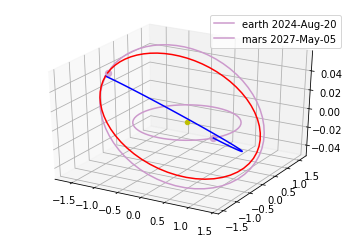

In [5]:
goto_mars()

In [ ]:
def goto_moon():
    # We define an Earth-Mars problem (single-objective)
    seq = [spice('EARTH'),spice('MOON','EARTH')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=False,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=12, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 12 parallel islands")
    archi.evolve(10)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

In [ ]:
    goto_moon()

In [1]:
import sys
sys.path

['',
 'C:\\Users\\oisin\\Anaconda3\\python36.zip',
 'C:\\Users\\oisin\\Anaconda3\\DLLs',
 'C:\\Users\\oisin\\Anaconda3\\lib',
 'C:\\Users\\oisin\\Anaconda3',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\oisin\\.ipython']

In [2]:
epoch(6700)

2018-May-06 00:00:00

In [4]:
x = jpl_lp('earth')

In [13]:
r,v=x.eph(epoch(6700))

In [14]:
r

(-106359704766.69928, -107043020626.04843, 4465162.394428717)

In [18]:
from pykep.planet import jpl_lp
class space:
    def __init__(self):
        self.planets = [jpl_lp('earth'), jpl_lp('mars'), ]

In [17]:
x= space()

RuntimeError: unknown planet name: sun

In [13]:
mars=jpl_lp('mars')

In [14]:
%timeit mars.eph(5000)

2.26 µs ± 70.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
file=open('derp.txt','w')

In [11]:
file.writelines([str([345]),str([345])])

In [12]:
file.close()

In [15]:
mars.eph(5000)

((-58533810172.42569, 232412243360.9977, 6306593460.416604),
 (-22577.439368944022, -3859.7389016289626, 473.3869862027911))

In [16]:
mars

Planet Name: mars
Own gravity parameter: 42828000000000
Central body gravity parameter: 1.32712440018e+020
Planet radius: 3397000
Planet safe radius: 3736700.0000000005
Ephemerides type: JPL low-precision